# Prueba de FFT en audio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import os
import os.path as path
from IPython.display import Audio

%matplotlib

Using matplotlib backend: Qt5Agg


## Variables de Entorno
Estas tal vez irían mejor en un archivo de configuración?

In [2]:
INPUT_DIR = os.path.join(os.getcwd(), "input")

In [3]:
train_dir = path.join(INPUT_DIR, "audio_train")
train_files = [os.path.abspath(os.path.join(train_dir, file)) 
               for file in os.listdir(train_dir)]

In [95]:
class Sound:
    def __init__(self, fname):
        self.filename = fname
        self.fs, self.y = wavfile.read(fname)
        
    def compute_ft(self):
        self.fty = np.fft.fft(self.y)
        
    def compute_spectrogram(self):
        self.f, self.t, self.sxx = spectrogram(self.y, self.fs, nperseg=300, noverlap=0)
        
    def play(self):
        return(Audio(filename = self.filename, autoplay = True))
    
    def plot_wave(self):
        plt.plot(self.y)
        
    def plot_ft(self):
        if not(hasattr(self, "fty")):
            self.compute_ft()

        frecs = np.linspace(0, 2*self.fs, len(self.y))
        plt.plot(frecs, abs(self.fty))
        plt.xlim(0,self.fs)
    
    def plot_spectrogram(self):
        if not(hasattr(self, "sxx")):
            self.compute_spectrogram()
            
        plt.imshow(np.log(self.sxx),
                   extent=(t[0], t[-1], f[0], f[-1]),
                   aspect=0.00011,
                   origin='lower',
                   interpolation=None) 

In [114]:
s = Sound(train_files[np.random.randint(0, len(train_files))])

In [119]:
s.play()

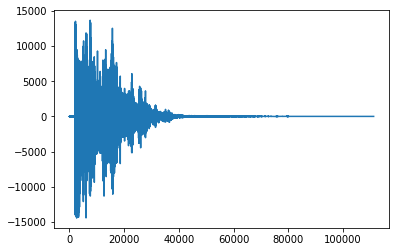

In [115]:
s.plot_wave()

In [116]:
s.compute_ft()

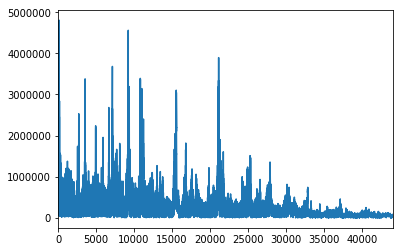

In [117]:
s.plot_ft()

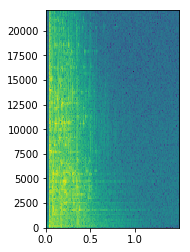

In [118]:
s.plot_spectrogram()

1152